In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data1=pd.read_csv(r'C:\Users\user\Downloads\car_age_price.csv')

In [30]:
data1.head()


,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [31]:
data1.shape

(112, 2)

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [33]:
data1.nunique()

Year      8
Price    35
dtype: int64

# Removing duplicate rows

In [34]:
duplicates=data1.duplicated()
data2=data1.drop_duplicates()

In [35]:
data2.shape

(58, 2)

In [36]:
data2.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
5,2015,350000
6,2016,425000


# checking for outliers

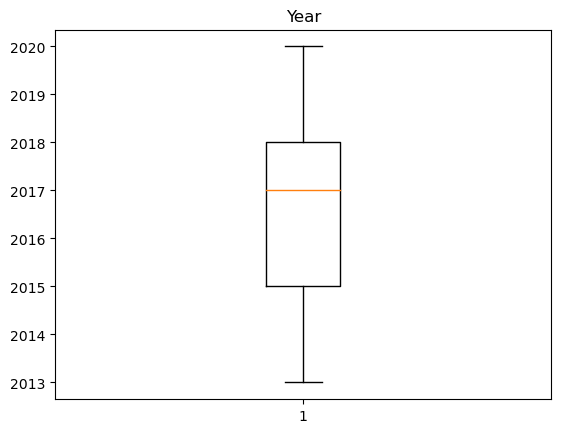

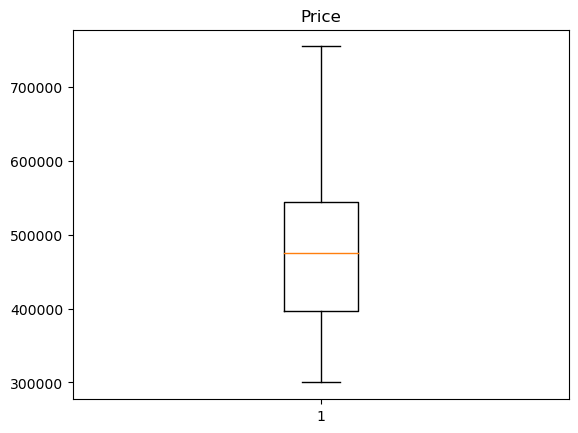

In [37]:
colm=['Year','Price']#Plotting to find the outliers
for i in colm:
    plt.figure()
    plt.boxplot (data2[i])
    plt.title(i)

# applying min max scaling

In [39]:
min_value=data2['Price'].min
max_value=data2['Price'].max


In [40]:
y1=data2.drop(['Year'],axis=1)

In [41]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
y1=min_max.fit_transform(y1)

In [42]:
min_max=MinMaxScaler()
y1=pd.DataFrame(y1,columns=['Price'])

In [43]:
y1.describe()

,Price
count,58.000000
mean,0.383403
std,0.232958
min,0.000000
25%,0.213187
50%,0.384615
75%,0.535714
max,1.000000


In [86]:
x1=data2['Year']#x1 contained the scaled price data and y1 contains the year data,here target is price
x1=pd.DataFrame(x1,columns=['Year'])

In [87]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

,Price
0,0.362637
1,1.000000
2,0.879121
3,0.109890
4,0.274725
5,0.604396
6,0.461536
7,0.439560
8,0.439560
9,0.439560


# creating Linear Regression Model

In [94]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x1_train,y1_train)#creating model
y1_pred=model.predict(x1_test)
y1_pred,y1_test#first is predicted value and 2nd is orginal value

(array([[0.53223204],
        [0.43169798],
        [0.43169798],
        [0.23062986],
        [0.13009581],
        [0.43169798],
        [0.23062986],
        [0.02956175],
        [0.23062986],
        [0.43169798],
        [0.73330015],
        [0.23062986],
        [0.23062986],
        [0.23062986],
        [0.53223204]]),
        Price
 0   0.362637
 5   0.604396
 34  0.428571
 13  0.296701
 44  0.197802
 52  0.164835
 37  0.000000
 25  0.054945
 46  0.043956
 12  0.549451
 48  0.747253
 3   0.109890
 36  0.362637
 31  0.417582
 8   0.439560)

#efficiency finding
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y1_test,y1_pred))
print(r2_score(y1_test,y1_pred))

In [89]:
#efficiency finding
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y1_test,y1_pred))
print(r2_score(y1_test,y1_pred))

0.02113647852150617
0.5390682389771295


In [90]:
b=model.predict([[2022]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [91]:
b

array([[0.93436827]])

In [92]:
c=max_value()-min_value()
unscaled_output=b*c+min_value()#to obtain the unscaled output

In [93]:
unscaled_output

array([[725137.56078431]])

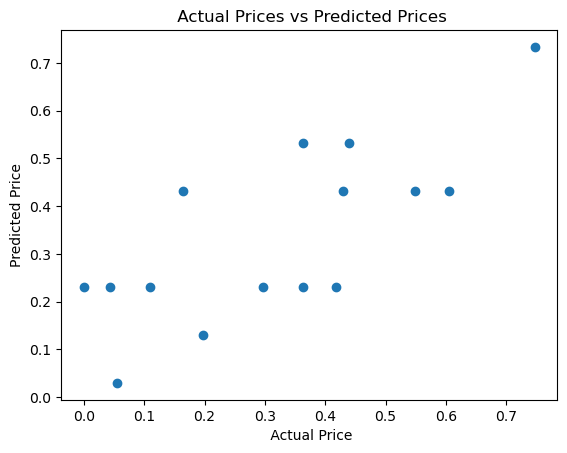

In [95]:
plt.scatter(y1_test, y1_pred)
plt.xlabel(" Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
     

# Using Lasso regression

In [104]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [105]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)


In [106]:
# Create a Lasso regression model
lasso = Lasso(alpha=0.1)

In [107]:
# Fit the model to the training data
lasso.fit(x1_train, y1_train)

Lasso(alpha=0.1)

In [108]:
# Predict on the test data
y_prediction = lasso.predict(x1_test)

In [109]:
# Evaluate the model
mse1 = mean_squared_error(y1_test, y_prediction)
print("Mean Squared Error:", mse1)

Mean Squared Error: 0.02908196260499057


In [110]:
cost=lasso.predict([[2022]])
cost

array([183.13678669])

In [111]:
unscaled_outputlasso=cost*c+min_value()
unscaled_outputlasso

array([83627237.9440179])

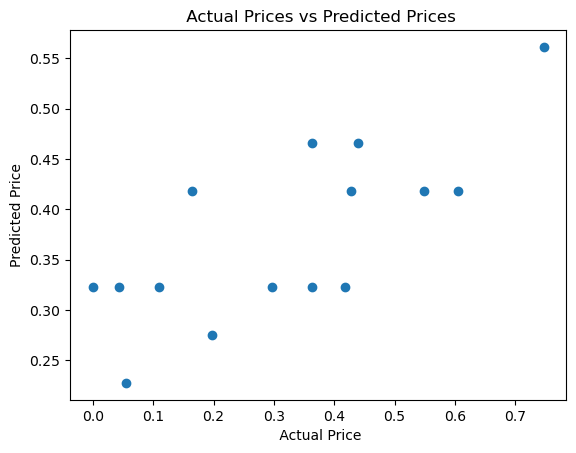

In [112]:
plt.scatter(y1_test, y_prediction)
plt.xlabel(" Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
     